**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [24]:
import numpy as np
from types import SimpleNamespace
import matplotlib.pyplot as plt
from scipy.optimize import minimize


## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

In [25]:
#Parameters
A = 1.0
gamma = 0.5
alpha = 0.3
nu = 1.0
epsilon = 2.0
tau = 0.0
T = 0.0
w = 1.0
kappa = 0.1

In [26]:
# we difine the functions in the model
def ell_star(p, w, A, gamma):
    return (p * A * gamma / w) ** (1 / (1 - gamma))

def y_star(ell, A, gamma):
    return A * ell ** gamma 

def pi_star(p, w, A, gamma):
    return (1 - gamma) / gamma * w * (p * A * gamma / w) ** (1 / (1 - gamma))

# we define the utility function
def utility(ell, c1, c2, alpha, nu, epsilon):
    return np.log(c1 ** alpha * c2 ** (1 - alpha)) - nu * (ell ** (1 + epsilon) / (1 + epsilon))

def consumption(ell, p1, p2, w, T, A, gamma, alpha):
    pi1 = pi_star(p1, w, A, gamma)
    pi2 = pi_star(p2, w, A, gamma)
    income = w * ell + T + pi1 + pi2
    c1 = alpha * income / p1
    c2 = (1 - alpha) * income / (p2 + tau)
    return c1, c2

# we define the market clearing conditions
def market_clearing_conditions(prices, w, A, gamma, alpha, nu, epsilon):
    p1, p2 = prices
    
    # How much is needed
    ell1 = ell_star(p1, w, A, gamma)
    ell2 = ell_star(p2, w, A, gamma)
    ell_total = ell1 + ell2

    # How much is consumed
    y1 = y_star(ell1, A, gamma)
    y2 = y_star(ell2, A, gamma)
    
    # Finding the utility maximizing labor supply
    def consumer_utility_max(ell):
        c1, c2 = consumption(ell, p1, p2, w, T, A, gamma, alpha)
        return -utility(ell, c1, c2, alpha, nu, epsilon)
    
    result = minimize(consumer_utility_max, x0=0.1, bounds=[(0, None)])
    ell_star_opt = result.x[0]
    c1_star, c2_star = consumption(ell_star_opt, p1, p2, w, T, A, gamma, alpha)
    
    # Checking if markets clear
    labor_market_clearing = ell_star_opt - ell_total  # Making sure work needed equals work supplied
    good_market_1_clearing = c1_star - y1
    good_market_2_clearing = c2_star - y2
    
    return [labor_market_clearing, good_market_1_clearing, good_market_2_clearing]

#  Testing the market clearing conditions
p1_range = np.linspace(0.1, 2.0, 10)
p2_range = np.linspace(0.1, 2.0, 10)
for p1 in p1_range:
    for p2 in p2_range:
        prices = [p1, p2]
        clearing_conditions = market_clearing_conditions(prices, w, A, gamma, alpha, nu, epsilon)
        print(f"Prices: p1 = {p1:.2f}, p2 = {p2:.2f}")
        print(f"Labor market clearing: {clearing_conditions[0]:.6f}")
        print(f"Good market 1 clearing: {clearing_conditions[1]:.6f}")
        print(f"Good market 2 clearing: {clearing_conditions[2]:.6f}")
        print()

Prices: p1 = 0.10, p2 = 0.10
Labor market clearing: 0.993337
Good market 1 clearing: 2.960010
Good market 2 clearing: 6.973358

Prices: p1 = 0.10, p2 = 0.31
Labor market clearing: 0.964483
Good market 1 clearing: 3.003635
Good market 2 clearing: 2.134671

Prices: p1 = 0.10, p2 = 0.52
Labor market clearing: 0.906311
Good market 1 clearing: 3.093006
Good market 2 clearing: 1.143211

Prices: p1 = 0.10, p2 = 0.73
Labor market clearing: 0.819428
Good market 1 clearing: 3.229950
Good market 2 clearing: 0.676954

Prices: p1 = 0.10, p2 = 0.94
Labor market clearing: 0.704710
Good market 1 clearing: 3.417092
Good market 2 clearing: 0.384353

Prices: p1 = 0.10, p2 = 1.16
Labor market clearing: 0.563205
Good market 1 clearing: 3.657579
Good market 2 clearing: 0.170868

Prices: p1 = 0.10, p2 = 1.37
Labor market clearing: 0.396060
Good market 1 clearing: 3.954847
Good market 2 clearing: 0.000421

Prices: p1 = 0.10, p2 = 1.58
Labor market clearing: 0.204431
Good market 1 clearing: 4.312367
Good marke

**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

In [27]:

# We define the range for p1 and p2
p1_range = np.linspace(0.1, 2.0, 10)
p2_range = np.linspace(0.1, 2.0, 10)
market_clearing_results = np.zeros((len(p1_range), len(p2_range)))

# We calculate the market clearing results for all combinations of p1 and p2
for i, p1 in enumerate(p1_range):
    for j, p2 in enumerate(p2_range):
        prices = [p1, p2]
        clearing_conditions = market_clearing_conditions(prices, w, A, gamma, alpha, nu, epsilon)
        market_clearing_results[i, j] = np.sum(np.abs(clearing_conditions))

# Finding the indices of the minimum value in the market clearing results
min_indices = np.unravel_index(np.argmin(market_clearing_results), market_clearing_results.shape)

# The equilibrium prices p1 and p2 is found
equilibrium_p1 = p1_range[min_indices[0]]
equilibrium_p2 = p2_range[min_indices[1]]

equilibrium_p1, equilibrium_p2

(0.9444444444444444, 1.577777777777778)

Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

In [28]:
p1 = 1.15
p2 = 1.36

# We define the utility function
def profit(w, p, A, gamma):
    return (1 - gamma) / gamma * w * (p * A * gamma / w) ** (1 / (1 - gamma))

def consumer_optimal_choices(w, p1, p2, tau, T, pi1_star, pi2_star, ell_star):
    # the optimal consumption of good 1 and good 2
    income = w * ell_star + T + pi1_star + pi2_star
    c1 = alpha * income / p1
    c2 = (1 - alpha) * income / (p2 + tau)
    return c1, c2

def labor_supply_optimization(w, p1, p2, A, gamma):
    # Optimal labor supply given prices is found by maximizing consumer utility
    ell_star_1 = (p1 * A * gamma / w) ** (1 / (1 - gamma))
    ell_star_2 = (p2 * A * gamma / w) ** (1 / (1 - gamma))
    return ell_star_1 + ell_star_2

def calculate_SWF(tau):
    pi1_star = profit(w, p1, A, gamma)
    pi2_star = profit(w, p2, A, gamma)
    
    # We calculate initial consumption with T = 0
    T_temp = 0
    ell_star = labor_supply_optimization(w, p1, p2, A, gamma)
    c1_temp, c2_temp = consumer_optimal_choices(w, p1, p2, tau, T_temp, pi1_star, pi2_star, ell_star)
    
    # Calculating the actual T based on tau and c2
    T = tau * c2_temp
    
    # Recalculating optimal labor supply and consumption with correct T
    ell_star = labor_supply_optimization(w, p1, p2, A, gamma)
    c1_star, c2_star = consumer_optimal_choices(w, p1, p2, tau, T, pi1_star, pi2_star, ell_star)
    
    # Consumer utility is given by 
    consumer_utility = np.log(c1_star ** alpha * c2_star ** (1 - alpha)) - nu * (ell_star ** (1 + epsilon)) / (1 + epsilon)
    
    # Social welfare function is given by
    swf = consumer_utility - kappa * c2_star
    return -swf  # Minimize negative SWF to maximize SWF

# Initial guess for tau
initial_tau = 0.5  
bounds = [(0.0, 1.0)]

# Performing the minimization of the SWF
result = minimize(calculate_SWF, initial_tau, bounds=bounds)
optimal_tau = result.x[0]
pi1_star = implied_profit(w, p1, A, gamma)
pi2_star = implied_profit(w, p2, A, gamma)

# Calculating optimal T with the optimal tau value found above
ell_star = labor_supply_optimization(w, p1, p2, A, gamma)
_, c2_star = consumer_optimal_choices(w, p1, p2, optimal_tau, 0, pi1_star, pi2_star, ell_star)
T = optimal_tau * c2_star

# Calculating SWF with optimal values
max_swf = result.fun 

print(f"Optimal tau: {optimal_tau}")
print(f"Implied T: {T}")
print(f"Maximum SWF found: {max_swf}")


NameError: name 'implied_profit' is not defined

## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [ ]:
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


In [ ]:
# We define the utility function
expected_utility = np.zeros(par.J)
average_realized_utility = np.zeros(par.J)

for j in range(par.J):
    utility_sum = 0
    for k in range(par.K):
        utility = par.v[j] + np.random.normal(0, par.sigma, size=par.K)
    expected_utility[j] = np.mean(utility)
    average_realized_utility[j] = j+1

expected_utility, average_realized_utility

(array([0.96046787, 1.9869205 , 3.01841944]), array([1., 2., 3.]))

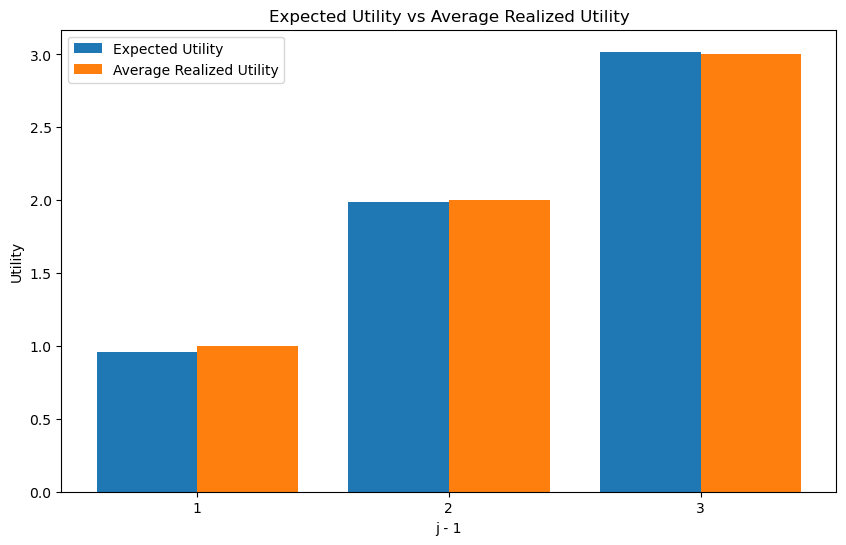

In [ ]:
j_values = np.arange(1, par.J+1)

# Ploting the results
plt.figure(figsize=(10, 6))
plt.bar(j_values - 0.2, expected_utility, 0.4, label='Expected Utility')
plt.bar(j_values + 0.2, average_realized_utility, 0.4, label='Average Realized Utility')
plt.xlabel('j - 1')
plt.ylabel('Utility')
plt.title('Expected Utility vs Average Realized Utility')
plt.xticks(j_values)
plt.legend()
plt.show()

Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

In [ ]:
# We define the utility function
share_of_graduates_all = np.zeros((par.N, par.J))
average_subjective_utility_all = np.zeros((par.N, par.J))
average_realized_utility_all = np.zeros((par.N, par.J))

# We calculate the share of graduates choosing each career
for i in range(10):
    share_of_graduates = np.zeros(par.J)
    average_subjective_utility = np.zeros(par.J)
    average_realized_utility = np.zeros(par.J)

    for _ in range(par.N):
        epsilon = np.random.normal(0, par.sigma, size=(par.J, par.F[i], par.K))
        prior_expected_utility = np.mean(par.v[:, np.newaxis, np.newaxis] + epsilon, axis=1)
        
        # Calculating the career choice of each graduate
        career_choice = np.argmax(prior_expected_utility, axis=0)
        
        # Calculating the share of graduates choosing each career
        for j in range(par.J):
            share_of_graduates[j] += np.mean(career_choice == j)

        # Calculating the average subjective expected utility
        for j in range(par.J):
            indices = np.where(career_choice == j)
            average_subjective_utility[j] += np.mean(prior_expected_utility[j, indices])
            average_realized_utility[j] += np.mean(par.v[j] + epsilon[j, :, indices].mean(axis=1))
    share_of_graduates /= par.N
    average_subjective_utility /= par.N
    average_realized_utility /= par.N
    share_of_graduates_all[i] = share_of_graduates
    average_subjective_utility_all[i] = average_subjective_utility
    average_realized_utility_all[i] = average_realized_utility

# Printing the results
for i in range(10):
    print(f"Results for graduate type {i+1}:")
    print("Share of Graduates: ", share_of_graduates_all[i])
    print("Average Subjective Utility: ", average_subjective_utility_all[i])
    print("Average Realized Utility: ", average_realized_utility_all[i])
    print()

Results for graduate type 1:
Share of Graduates:  [0.1527  0.29966 0.54764]
Average Subjective Utility:  [3.40794391 3.76307756 4.1019561 ]
Average Realized Utility:  [3.40794391 3.76307756 4.1019561 ]

Results for graduate type 2:
Share of Graduates:  [0.09804 0.27426 0.6277 ]
Average Subjective Utility:  [2.9428254  3.29483919 3.64796078]
Average Realized Utility:  [2.9428254  3.29483919 3.64796078]

Results for graduate type 3:
Share of Graduates:  [0.06713 0.24752 0.68535]
Average Subjective Utility:  [2.72792059 3.08656506 3.44601912]
Average Realized Utility:  [2.72792059 3.08656506 3.44601912]

Results for graduate type 4:
Share of Graduates:  [0.04629 0.2247  0.72901]
Average Subjective Utility:  [2.6061477  2.97626089 3.33724168]
Average Realized Utility:  [2.6061477  2.97626089 3.33724168]

Results for graduate type 5:
Share of Graduates:  [0.03476 0.20211 0.76313]
Average Subjective Utility:  [2.52803986 2.90197776 3.26688966]
Average Realized Utility:  [2.52803986 2.9019777

After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

In [ ]:
# there are still 10 graduates so we set up new arrays with that are par.N long
np.random.seed(2**6)
new_career_choice = np.zeros(par.N)
new_expected_utility = np.zeros(par.N)
new_realized_utility = np.zeros(par.N)

for i in range(par.N):
    new_career_choice[i]=np.argmax(par.v + np.random.normal(0, par.sigma, size=par.J) - par.c)
    new_expected_utility = par.v + np.random.normal(0, par.sigma, size=par.J) - par.c
    if average_realized_utility.any() < new_expected_utility.any():
        new_career_choice[i] = np.argmax(new_expected_utility)
        new_realized_utility[i] = new_expected_utility[new_career_choice]
    new_realized_utility[i]=new_expected_utility[np.argmax(new_expected_utility)]
# Printing the values of the new arrays. we cannot find the correct answers.
print("new_career_choice:", new_career_choice)
print("new_expected_utility:", new_expected_utility) #we cannot make this give 10 answers.
print("new_realized_utility:", new_realized_utility)

# it feels like our answer is very wrong.


new_career_choice: [0. 1. 2. 2. 1. 1. 1. 1. 1. 2.]
new_expected_utility: [-0.4131038  -0.47472331 -1.71466402]
new_realized_utility: [ 4.38583273  5.50097161 -0.01005406  3.18926381  3.47734718 -0.71668134
  1.3504314   4.71541099  6.80915287 -0.4131038 ]


## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [ ]:
rng = np.random.default_rng(2024)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))


**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

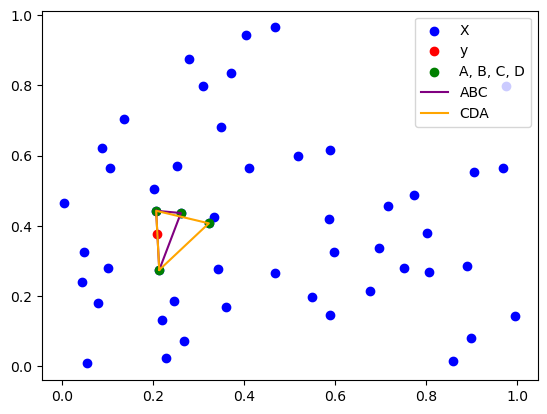

A: [0.20634391 0.44272557], B: [0.26071605 0.43635845], C: [0.21315735 0.274245  ], D: [0.32209779 0.40699871]
Barycentric coordinates with respect to ABC: (0.6134829803310216, 0.0008797864519075784, 0.3856372332170709)
Barycentric coordinates with respect to CDA: (0.3855821621027246, 0.00041649660997332384, 0.614001341287302)


In [ ]:
def barycentric_coords(A, B, C, y):
    ABC = ((B[1] - C[1])*(A[0] - C[0]) + (C[0] - B[0])*(A[1] - C[1]))
    r1 = ((B[1] - C[1])*(y[0] - C[0]) + (C[0] - B[0])*(y[1] - C[1])) / ABC
    r2 = ((C[1] - A[1])*(y[0] - C[0]) + (A[0] - C[0])*(y[1] - C[1])) / ABC
    return r1, r2, 1 - r1 - r2

def find_points(X, y):
    distances = np.sum((X - y)**2, axis=1)
    return X[np.argsort(distances)[:4]]

rng = np.random.default_rng(2024)
X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))
A, B, C, D = find_points(X, y)
r_ABC = barycentric_coords(A, B, C, y)
r_CDA = barycentric_coords(C, D, A, y)

def plot_points_and_triangles(X, y, A, B, C, D):
    plt.scatter(X[:, 0], X[:, 1], color='blue', label='X')
    plt.scatter(y[0], y[1], color='red', label='y')
    plt.scatter([A[0], B[0], C[0], D[0]], [A[1], B[1], C[1], D[1]], color='green', label='A, B, C, D')
    plt.plot([A[0], B[0], C[0], A[0]], [A[1], B[1], C[1], A[1]], color='purple', label='ABC')
    plt.plot([C[0], D[0], A[0], C[0]], [C[1], D[1], A[1], C[1]], color='orange', label='CDA')
    plt.legend()
    plt.show()

plot_points_and_triangles(X, y, A, B, C, D)
print(f"A: {A}, B: {B}, C: {C}, D: {D}")
print(f"Barycentric coordinates with respect to ABC: {r_ABC}")
print(f"Barycentric coordinates with respect to CDA: {r_CDA}")

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

In [ ]:
def is_inside_triangle(r):
    return all(0 <= ri <= 1 for ri in r)

# Determine which triangle y is inside
r_ABC = barycentric_coords(A, B, C, y)
r_CDA = barycentric_coords(C, D, A, y)
inside_ABC = is_inside_triangle(r_ABC)
inside_CDA = is_inside_triangle(r_CDA)

if inside_ABC:
    print("Point y is inside triangle ABC.")
elif inside_CDA:
    print("Point y is inside triangle CDA.")
else:
    print("Point y is not inside either triangle ABC or CDA.")

Point y is inside triangle ABC.


Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [ ]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

In [ ]:
# We define the function f 
def f(x):
    return x[0]**2 + x[1]**2
true_value = f(y)

# We calculate the approximation of f(y) using the barycentric coordinates
approximation = (f(A) + f(B) + f(C) + f(D)) / 4

# Comparing the approximation with the true value
print(f"True value of f(y): {true_value}")
print(f"Approximated value of f(y): {approximation}")
print(f"Difference: {abs(true_value - approximation)}")

True value of f(y): 0.18638229126607866
Approximated value of f(y): 0.22175165157803664
Difference: 0.035369360311957976


**Question 4:** Repeat question 3 for all points in the set $Y$.

In [ ]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

In [ ]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

for i, y in enumerate(Y):
    true_value = f(y)
    A, B, C, D = find_points(X, y)
    approximation = (f(A) + f(B) + f(C) + f(D)) / 4
    
    # Calculate the difference between the true value and the approximation and print the results
    difference = abs(true_value - approximation)
    print(f"Point {i+1}: y = {y}, True value = {true_value}, Approximation = {approximation}, Difference = {difference}")

Point 1: y = (0.2, 0.2), True value = 0.08000000000000002, Approximation = 0.07972239164920969, Difference = 0.000277608350790326
Point 2: y = (0.8, 0.2), True value = 0.6800000000000002, Approximation = 0.685256425111715, Difference = 0.005256425111714869
Point 3: y = (0.8, 0.8), True value = 1.2800000000000002, Approximation = 1.175255083927559, Difference = 0.10474491607244119
Point 4: y = (0.8, 0.2), True value = 0.6800000000000002, Approximation = 0.685256425111715, Difference = 0.005256425111714869
Point 5: y = (0.5, 0.5), True value = 0.5, Approximation = 0.5904897491242599, Difference = 0.09048974912425989
